### 01. 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import sklearn.metrics as mt

from sklearn import svm                       # svm 라이브러리에 svc/svr 모두 존재
from sklearn.metrics import accuracy_score

### 02. 데이터 불러오기 (xlsx)

In [2]:
df = pd.read_excel('wpdb.xlsx')
df.head()

,UID,CenterId,StudentName,SchoolName,SchoolGrade,SchoolLevel,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,00249736-53A0-4D68-8CB9-DFA306A33435,15,임현승,성동중학교,1학년,high,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,00515C99-00A6-444B-93A3-73D7BB0852E5,15,노해율,내성중학교,3학년,middle,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,00600FC7-C7DE-40DE-AD7D-A1D94DD5D212,16,신아인,경일중학교,3학년,middle,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,0063DEBD-095C-4804-A246-7EDD5160419A,14,손태윤,브니엘예술중학교,3학년,middle,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,007378EC-9A44-4A75-8B1A-70D13FBE7832,16,오주안,오션중학교,3학년,middle,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


### 03. 학습에 사용될 데이터와 예측 데이터 설정
- 학습 데이터 X
- 예측 데이터 y
    - 0과 1의 값만 존재하며, 분류를 이용하여 예측 예정

In [3]:
X=df[df.columns[6:]]
X.head()

,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


In [4]:
X = X.drop(columns = ['Address','Address2', 'max_sche_date', 'StudentStatus'])
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,5,0,3,0,0,1,41,0
1,16,5,0,19,0,0,0,52,0
2,16,8,0,0,0,0,0,0,1
3,16,2,0,0,0,0,0,6,0
4,16,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,15,2,1,20,0,0,0,64,1
2493,16,9,0,0,0,0,0,0,1
2494,16,3,1,9,0,0,0,23,0
2495,17,6,0,0,0,0,0,0,1


### 04. 나이 데이터 0, 1, 2로 변환

In [5]:
X['StudentGrade'].replace({15: 0, 16: 1, 17:2}, inplace=True)

In [6]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,2,5,0,3,0,0,1,41,0
1,1,5,0,19,0,0,0,52,0
2,1,8,0,0,0,0,0,0,1
3,1,2,0,0,0,0,0,6,0
4,1,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64,1
2493,1,9,0,0,0,0,0,0,1
2494,1,3,1,9,0,0,0,23,0
2495,2,6,0,0,0,0,0,0,1


In [7]:
pd.DataFrame(X).describe()

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,1.080497,10.095715,0.236684,8.060473,0.010813,0.028835,2.785342,64.474169,0.567080
std,0.822076,10.497140,0.648321,9.690521,0.130807,0.447538,5.310735,80.639647,0.495579
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,6.000000,0.000000,4.000000,0.000000,0.000000,0.000000,31.000000,1.000000
75%,2.000000,14.000000,0.000000,13.000000,0.000000,0.000000,3.000000,95.000000,1.000000
max,2.000000,62.000000,19.000000,64.000000,2.000000,11.000000,54.000000,396.000000,1.000000


In [8]:
print(X.shape)
type(X)

(2497, 9)


pandas.core.frame.DataFrame

In [9]:
# 정답(레이블) 설정
y = X['target']
y # 0과 1로 구분, 1:재원 / 0:퇴원

0       0
1       0
2       1
3       0
4       1
       ..
2492    1
2493    1
2494    0
2495    1
2496    0
Name: target, Length: 2497, dtype: int64

In [10]:
print(y.shape)

(2497,)


In [11]:
X = X.drop(columns = ['target'])

In [12]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count
0,2,5,0,3,0,0,1,41
1,1,5,0,19,0,0,0,52
2,1,8,0,0,0,0,0,0
3,1,2,0,0,0,0,0,6
4,1,29,0,23,0,0,1,278
...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64
2493,1,9,0,0,0,0,0,0
2494,1,3,1,9,0,0,0,23
2495,2,6,0,0,0,0,0,0


### 05. 결측치 확인

In [13]:
X.isnull().sum()

StudentGrade          0
cs_count              0
withdraw_csl_count    0
remain_csl_count      0
supply_count          0
clinic_count          0
abs_count             0
pre_count             0
dtype: int64

### 06. 데이터 정규화

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

### 1) 학습 데이터의 정규화

In [15]:
scaler_minmax.fit(X)
X_scaled_minmax_train=scaler_minmax.transform(X)
pd.DataFrame(X_scaled_minmax_train).describe()

# 최소값(min)은 0으로, 최대값(max)은 1로 나타난 걸 확인할 수 있음

,0,1,2,3,4,5,6,7
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,0.540248,0.149110,0.012457,0.125945,0.005406,0.002621,0.051580,0.162814
std,0.411038,0.172084,0.034122,0.151414,0.065404,0.040685,0.098347,0.203635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016393,0.000000,0.015625,0.000000,0.000000,0.000000,0.010101
50%,0.500000,0.081967,0.000000,0.062500,0.000000,0.000000,0.000000,0.078283
75%,1.000000,0.213115,0.000000,0.203125,0.000000,0.000000,0.055556,0.239899
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
'''X_scaled_standard_train'''

'X_scaled_standard_train'

### 2) 검증 데이터의 정규화

In [17]:
'''scaler_standard.fit(X_val)
X_scaled_standard_train=scaler_standard.transform(X_val)
pd.DataFrame(X_scaled_standard_train).describe()'''

'scaler_standard.fit(X_val)\nX_scaled_standard_train=scaler_standard.transform(X_val)\npd.DataFrame(X_scaled_standard_train).describe()'

### 3) 테스트 데이터의 정규화

In [18]:
'''X_scaled_minmax_test=scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()'''

'X_scaled_minmax_test=scaler_minmax.transform(X_test)\npd.DataFrame(X_scaled_minmax_test).describe()'

### 07. 학습 데이터와 검증용 데이터 분리
- Train/Test set 분리
- Train/Validation/Test set 분리

In [19]:
# Train/Test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 1) 

# stratify : 훈련 데이터와 테스트 데이터를 구분할 때, 레이블의 범주비율에 맞게 하라는 것 (회귀에는 사용 X)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1997, 8), (500, 8), (1997,), (500,))

In [21]:
'''# Train/Validation/Test set 분리 (6:2:2)

X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)'''

'# Train/Validation/Test set 분리 (6:2:2)\n\nX_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)'

In [22]:
'''X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape'''

'X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape'

### 08. SVM 모델 학습

#### 1. 기본적인 SVM 적합

In [23]:
svm_clf = svm.SVC(kernel = "linear", C=1)
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

### 09. 테스트셋에 대한 모델 예측 시행

In [24]:
# confusion matrix를 통한 정확도 확인
from sklearn.metrics import confusion_matrix    # confusion_matrix라이브러리

y_pred1 = svm_clf.predict(X_test)                        
confusion_matrix(y_test, y_pred1)  

array([[152,  64],
       [ 65, 219]], dtype=int64)

In [25]:
# 정확도 평가
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.742


#### 2. 기본적인 Kernel SVM 적합 및 비교

__1) Linear SVC__
-  위에서 SVC에서 kernel을  "linear"로 설정하여 Linear SVC 모델을 확인하였다. 하지만, sklearn의 SVM 모듈안에는 LinearSVC이라는 함수가 따로 존재한다. 그리고 결과 또한 차이가 발생한다.

In [83]:
# LinearSVM 활용

C=2

linear_clf = svm.LinearSVC(C=C, random_state=42)              # 학습 반복횟수 10000 = 'max_iter = 10000 ' 추가하면됨
linear_clf.fit(X_train, y_train)

y_pred2 = linear_clf.predict(X_test)
confusion_matrix(y_test, y_pred2)

C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[131,  99],
       [ 22, 248]], dtype=int64)

In [84]:
# 정확도 평가
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.758


✅ 최적의 C 구하기

C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to 

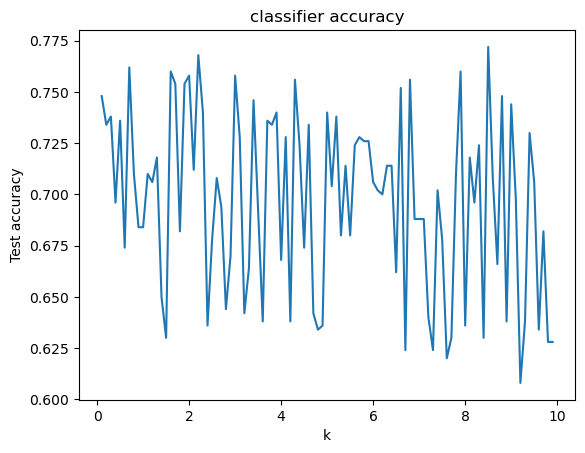

In [106]:
k_list = list(np.arange(0.1, 10, 0.1))
accuracy = []

for k in k_list:
    classifier = svm.LinearSVC(C=k, random_state=42)        # C 값이 클수록 오류를 덜 허용!!!!!!!!
    classifier.fit(X_train, y_train)
    accuracy.append(classifier.score(X_test, y_test))

    
from importlib import reload           # matplotlib xlabel, ylabel 오류 해결 코드!
plt=reload(plt)    
    
plt.plot(k_list, accuracy)
plt.xlabel("k")
plt.ylabel("Test accuracy")
plt.title('classifier accuracy')
plt.show()

In [107]:
# Find the maximum accuracy and its corresponding k value
max_accuracy = np.max(accuracy)
best_k = k_list[np.argmax(accuracy)]
print(f"Maximum accuracy: {max_accuracy} at k = {best_k}")

Maximum accuracy: 0.772 at k = 8.5


__2) radial basis function SVC__

In [88]:
# rbf 활용

clf_rbf = svm.SVC(kernel = 'rbf', gamma = 0.5, C=10, max_iter = 10000)    
#gamma는 sigma^2에 해당하는 scale parameter
#학습 반복횟수 10000

clf_rbf.fit(X_train, y_train)
y_pred3 = clf_rbf.predict(X_test)
confusion_matrix(y_test, y_pred3)

array([[ 99, 131],
       [ 23, 247]], dtype=int64)

In [89]:
# 정확도 평가
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 0.692


✅ 최적 파라미터 구하기

In [90]:
from sklearn.model_selection import GridSearchCV   
# GridSearchCV : 지정된 매개변수 그리드를 철저하게 검색하여 머신러닝 모델에 가장 적합한 매개변수를 찾는 하이퍼파라미터 튜닝 기술

params = {
    'gamma': [0.1, 0.3, 0.5, 0.7, 1],  # 범위값을 지정
    'C': [0.1, 1, 5, 10],
    'max_iter' : [1000, 5000, 10000]
          }
          
# 객체 생성
svm_rbf = svm.SVC(kernel = 'rbf')

# 최적의 하이퍼 파라미터를 찾는 객체 생성
grid_df = GridSearchCV(svm_rbf, params, cv=5)   # cv: 데이터 교차검증 수
                                                # svm_rbf : 하이퍼파라미터를 조정하려는 estimator
# 학습
grid_df.fit(X_train, y_train)

# best_params_: 최적의 성능을 만들 하이퍼 파라미터를 알려줌(params로 설정해놓은 범위 내에서)
grid_df.best_params_ 

C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Con

{'C': 5, 'gamma': 0.1, 'max_iter': 1000}

In [91]:
result = pd.DataFrame(grid_df.cv_results_['params'])
result['mean_test_score'] = grid_df.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,max_iter,mean_test_score
30,5.0,0.1,1000,0.752130
32,5.0,0.1,10000,0.749629
31,5.0,0.1,5000,0.749629
17,1.0,0.1,10000,0.746622
16,1.0,0.1,5000,0.746622
15,1.0,0.1,1000,0.745622
47,10.0,0.1,10000,0.744122
46,10.0,0.1,5000,0.744122
45,10.0,0.1,1000,0.742617
35,5.0,0.3,10000,0.707559


✅ 최적 파라미터 적용했을 때의 정확도

In [93]:
# 최적의 하이퍼 파라미터 적용
best_rbf = svm.SVC(kernel = 'rbf', gamma = 0.1, C=5, max_iter = 1000)
best_rbf.fit(X_train, y_train)

y_pred_rbf = best_rbf.predict(X_test)

accuracy_rbf = mt.accuracy_score(y_test, y_pred_rbf)
print('Accuracy: ', format(accuracy_rbf,'.2f'),'\n')

Accuracy:  0.75 



C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


__3) polynomial SVC__

In [30]:
# polynomial 활용

clf_poly = svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=5, max_iter = 10000)    
#3차항으로 설정, degree = 3
#gamma는 sigma^2에 해당하는 scale parameter
#학습 반복횟수 10000

clf_poly.fit(X_train, y_train)
y_pred4 = clf_poly.predict(X_test)
confusion_matrix(y_test, y_pred4)

C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([[ 29, 187],
       [ 34, 250]], dtype=int64)

In [31]:
# 정확도 평가
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

Accuracy: 0.558


✅ 최적 파라미터 구하기

In [96]:
params_2 = {
    'gamma': ['auto', 0.1, 0.3, 0.5, 0.7, 1],  # 범위값을 지정
    'C': [0.1, 1, 5, 10],
    'max_iter' : [1000, 5000, 10000],
    'degree' : [3, 5, 7, 10]
          }
          
# 객체 생성
svm_pol = svm.SVC(kernel = 'poly')

# 최적의 하이퍼 파라미터를 찾는 객체 생성
grid_df_2 = GridSearchCV(svm_pol, params_2, cv=5)   # cv: 데이터 교차검증 수
                                                # svm_rbf : 하이퍼파라미터를 조정하려는 estimator
# 학습
grid_df_2.fit(X_train, y_train)

# best_params_: 최적의 성능을 만들 하이퍼 파라미터를 알려줌(params로 설정해놓은 범위 내에서)
grid_df_2.best_params_ 

C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Con

{'C': 0.1, 'degree': 10, 'gamma': 'auto', 'max_iter': 1000}

In [100]:
result = pd.DataFrame(grid_df_2.cv_results_['params'])
result['mean_test_score'] = grid_df_2.cv_results_['mean_test_score']
result_sorted = result.sort_values(by='mean_test_score', ascending=False)

# Select the top 10 rows
top_10_results = result_sorted.head(10)
top_10_results

,C,degree,gamma,max_iter,mean_test_score
126,1.0,10,auto,1000,0.55635
55,0.1,10,auto,5000,0.55635
200,5.0,10,auto,10000,0.55635
272,10.0,10,auto,10000,0.55635
128,1.0,10,auto,10000,0.55635
271,10.0,10,auto,5000,0.55635
270,10.0,10,auto,1000,0.55635
199,5.0,10,auto,5000,0.55635
127,1.0,10,auto,5000,0.55635
198,5.0,10,auto,1000,0.55635


__4) sigmoid SVC__

In [71]:
svm_sigmoid = svm.SVC(kernel='sigmoid', C=1)

In [72]:
svm_sigmoid.fit(X_train, y_train)
y_pred5 = svm_sigmoid.predict(X_test)
confusion_matrix(y_test, y_pred5)

array([[ 52, 178],
       [150, 120]], dtype=int64)

In [73]:
# 정확도 평가
accuracy5 = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy5)

Accuracy: 0.344


In [32]:
import sklearn.metrics as mt

In [33]:
print('Train_Accuracy: ', linear_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred1)
recall = mt.recall_score(y_test, y_pred1)
precision = mt.precision_score(y_test, y_pred1)
f1_score = mt.f1_score(y_test, y_pred1)
matrix = mt.confusion_matrix(y_test, y_pred1)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.7150726089133701 

Accuracy:  0.74 

Recall:  0.77 

Precision:  0.77 

F1_score:  0.77 

Confusion Matrix: 
 [[152  64]
 [ 65 219]]


In [34]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN) 수동 정확도 계산
(152+219) / matrix .sum()

0.742

### 10. 시각화를 통한 Kernel SVM 정확도(accuracy) 비교
- 하이퍼 파라미터 설정에 따라 결과 달라질 수 있음

C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


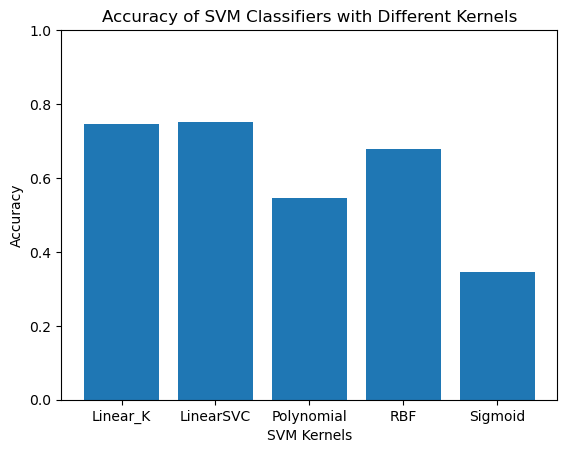

In [101]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM classifiers with different kernels
C = 1.0
svm_linear_k = svm.SVC(kernel='linear', C=C)
svm_linear = svm.LinearSVC(C=C, max_iter=10000)
svm_poly = svm.SVC(kernel='poly', degree=3, C=C)
svm_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
svm_sigmoid = svm.SVC(kernel='sigmoid', C=C)

# Train each SVM classifier
classifiers = [svm_linear_k, svm_linear, svm_poly, svm_rbf, svm_sigmoid]
accuracy_scores = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracies
kernel_names = ['Linear_K', 'LinearSVC', 'Polynomial', 'RBF', 'Sigmoid']
plt.bar(kernel_names, accuracy_scores)
plt.xlabel('SVM Kernels')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Classifiers with Different Kernels')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()

### 11. K-Fold 교차검증(cross-validation)

In [63]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
scores = cross_val_score(svm_linear_k, X, y, cv = 5)
scores

array([0.754     , 0.726     , 0.74348697, 0.75551102, 0.70140281])

In [64]:
pd.DataFrame(cross_validate(svm_linear_k, X, y, cv =5))

,fit_time,score_time,test_score
0,2.482707,0.015582,0.754000
1,1.756244,0.016010,0.726000
2,2.336776,0.000000,0.743487
3,2.187464,0.000000,0.755511
4,2.365896,0.016500,0.701403


In [65]:
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.7360801603206413
